<a href="https://colab.research.google.com/github/AlfanMarcel/PCVK/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

In [19]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', 0)  # 0 untuk membaca dalam skala abu-abu (grayscale)

# Buat Structuring Element Dilasi (SED) berbentuk square 3x3
sed = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)

# Fungsi dilasi
def dilate(image, sed):

    m, n = image.shape

    y, x = sed.shape

    y = y // 2

    x = x // 2

    dilated_image = np.zeros((m, n), dtype=np.uint8)

    for i in range(y, m - y):
        for j in range(x, n - x):
            dilated_image[i, j] = np.max(image[i - y:i + y + 1, j - x:j + x + 1] * sed)

    return dilated_image

# Terapkan dilasi ke gambar


Text(0.5, 1.0, 'Dilatasi')

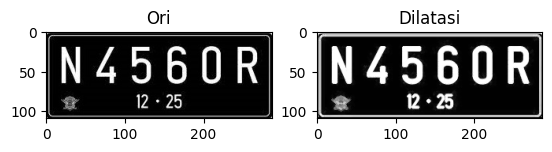

In [20]:
dilated_image = dilate(image, sed)

plt.subplot(1, 2, 1)  # Subplot pertama
plt.imshow(image,cmap = 'gray')
plt.title('Ori')

plt.subplot(1, 2, 2)  # Subplot kedua
plt.imshow(dilated_image,cmap = 'gray')
plt.title('Dilatasi')

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:

Text(0.5, 1.0, 'Dilatasi')

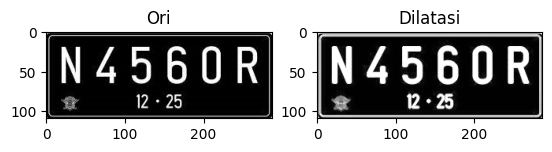

In [23]:
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

cross_image = cv.dilate(image, kernel)

plt.subplot(1, 2, 1)  # Subplot pertama
plt.imshow(image,cmap = 'gray')
plt.title('Ori')

plt.subplot(1, 2, 2)  # Subplot kedua
plt.imshow(cross_image,cmap = 'gray')
plt.title('Dilatasi')

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:

In [17]:
sed = np.ones((5, 5), np.uint8)

def erode(image, se):

    m, n = image.shape

    y, x = se.shape

    y = y // 2

    x = x // 2

    eroded_image = np.zeros((m, n), dtype=np.uint8)

    for i in range(y, m - y):
        for j in range(x, n - x):
            eroded_image[i, j] = np.min(image[i - y:i + y + 1, j - x:j + x + 1] * se)

    return eroded_image

Text(0.5, 1.0, 'Erosi')

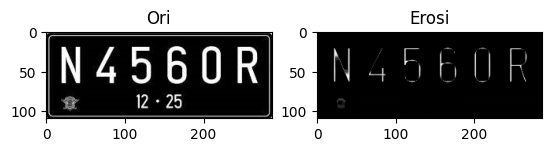

In [18]:
eroded_image = erode(image, sed)

plt.subplot(1, 2, 1)  # Subplot pertama
plt.imshow(image,cmap = 'gray')
plt.title('Ori')

plt.subplot(1, 2, 2)  # Subplot kedua
plt.imshow(eroded_image,cmap = 'gray')
plt.title('Erosi')

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini:

Text(0.5, 1.0, 'erosi')

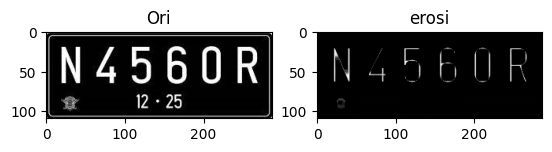

In [22]:
sed = np.ones((5, 5), np.uint8)

eroted_image = cv.erode(image, sed)

plt.subplot(1, 2, 1)  # Subplot pertama
plt.imshow(image,cmap = 'gray')
plt.title('Ori')

plt.subplot(1, 2, 2)  # Subplot kedua
plt.imshow(eroted_image,cmap = 'gray')
plt.title('erosi')

 7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:


Text(0.5, 1.0, 'Opened with Library')

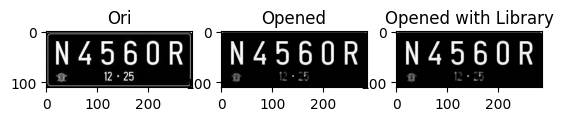

In [24]:
se = np.ones((3, 3), np.uint8)

# Operasi Erosi
eroded_image = erode(image, se)

# Operasi Dilasi
opened_image = dilate(eroded_image, se)

# Operasi Opening menggunakan morphology dari OpenCV
openedcv_image = cv.morphologyEx(image, cv.MORPH_OPEN, se)

# Tampilkan gambar asli dan hasil opening

plt.subplot(1, 3, 1)  # Subplot pertama
plt.imshow(image,cmap = 'gray')
plt.title('Ori')

plt.subplot(1, 3, 2)  # Subplot kedua
plt.imshow(opened_image,cmap = 'gray')
plt.title('Opened')

plt.subplot(1, 3, 3)  # Subplot ketiga
plt.imshow(openedcv_image,cmap = 'gray')
plt.title('Opened with Library')

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:
operasi closing tanpa library morphology

Text(0.5, 1.0, 'Closed with Library')

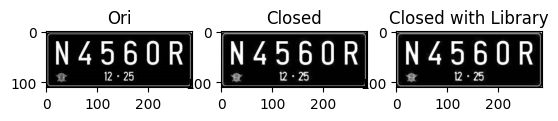

In [25]:
se = np.ones((3, 3), np.uint8)

# Operasi Dilasi
dilated_image =dilate(image, se)

# Operasi Erosi
closed_image1 =erode(dilated_image, se)

# Operasi Closing menggunakan morphology dari OpenCV
closed_image2 = cv.morphologyEx(image, cv.MORPH_CLOSE, se)

plt.subplot(1, 3, 1)  # Subplot pertama
plt.imshow(image,cmap = 'gray')
plt.title('Ori')

plt.subplot(1, 3, 2)  # Subplot kedua
plt.imshow(closed_image1,cmap = 'gray')
plt.title('Closed')

plt.subplot(1, 3, 3)  # Subplot ketiga
plt.imshow(closed_image2,cmap = 'gray')
plt.title('Closed with Library')

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5

Text(0.5, 1.0, '5 x 5')

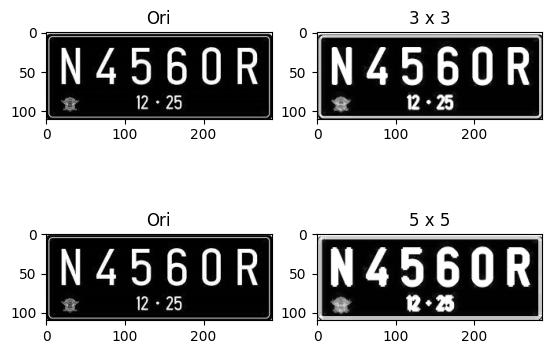

In [39]:
se_3x3 = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

# Buat Structuring Element (SE) berbentuk Cross 5x5
se_5x5 = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))

# Operasi Dilasi dengan SE 3x3
dilated_image_3x3 = cv.dilate(image, se_3x3)

# Operasi Dilasi dengan SE 5x5
dilated_image_5x5 = cv.dilate(image, se_5x5)

plt.subplot(2, 2, 1)  # Subplot pertama
plt.imshow(image,cmap = 'gray')
plt.title('Ori')

plt.subplot(2, 2, 2)  # Subplot kedua
plt.imshow(dilated_image_3x3,cmap = 'gray')
plt.title('3 x 3')

plt.subplot(2, 2, 3)  # Subplot pertama
plt.imshow(image,cmap = 'gray')
plt.title('Ori')

plt.subplot(2, 2, 4)  # Subplot ketiga
plt.imshow(dilated_image_5x5 ,cmap = 'gray')
plt.title('5 x 5')


10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5,

Text(0.5, 1.0, '5 x 5')

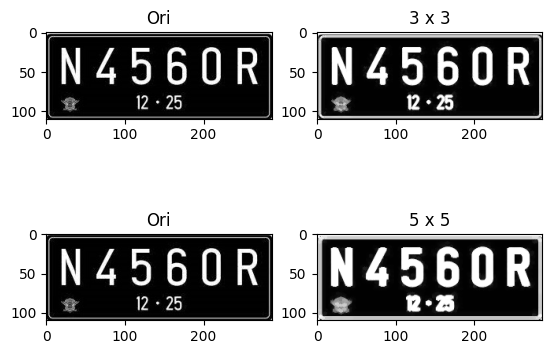

In [41]:
se_3x3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))

se_5x5 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

dilated_image_3x3 = cv.dilate(image, se_3x3)

dilated_image_5x5 = cv.dilate(image, se_5x5)

plt.subplot(2, 2, 1)  # Subplot pertama
plt.imshow(image,cmap = 'gray')
plt.title('Ori')

plt.subplot(2, 2, 2)  # Subplot kedua
plt.imshow(dilated_image_3x3,cmap = 'gray')
plt.title('3 x 3')

plt.subplot(2, 2, 3)  # Subplot pertama
plt.imshow(image,cmap = 'gray')
plt.title('Ori')

plt.subplot(2, 2, 4)  # Subplot ketiga
plt.imshow(dilated_image_5x5 ,cmap = 'gray')
plt.title('5 x 5')

 11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7

Text(0.5, 1.0, '5 x 7')

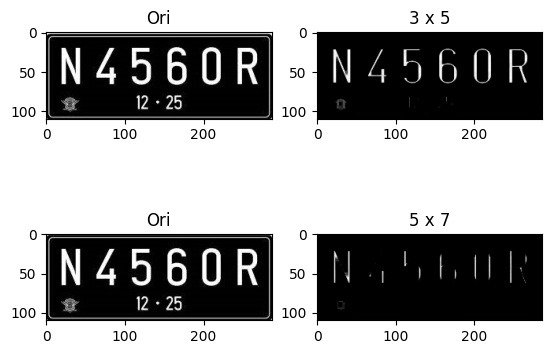

In [42]:
# Buat Structuring Element (SE) berbentuk Rectangle 3x5
se_3x5 = cv.getStructuringElement(cv.MORPH_RECT, (3, 5))

# Buat Structuring Element (SE) berbentuk Rectangle 5x7
se_5x7 = cv.getStructuringElement(cv.MORPH_RECT, (5, 7))

# Operasi Erosi dengan SE 3x5
eroded_image_3x5 = cv.erode(image, se_3x5)

# Operasi Erosi dengan SE 5x7
eroded_image_5x7 = cv.erode(image, se_5x7)

plt.subplot(2, 2, 1)  # Subplot pertama
plt.imshow(image,cmap = 'gray')
plt.title('Ori')

plt.subplot(2, 2, 2)  # Subplot kedua
plt.imshow(eroded_image_3x5 ,cmap = 'gray')
plt.title('3 x 5')

plt.subplot(2, 2, 3)  # Subplot pertama
plt.imshow(image,cmap = 'gray')
plt.title('Ori')

plt.subplot(2, 2, 4)  # Subplot kedua
plt.imshow(eroded_image_5x7 ,cmap = 'gray')
plt.title('5 x 7')

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5,

Text(0.5, 1.0, 'Line vertical 5')

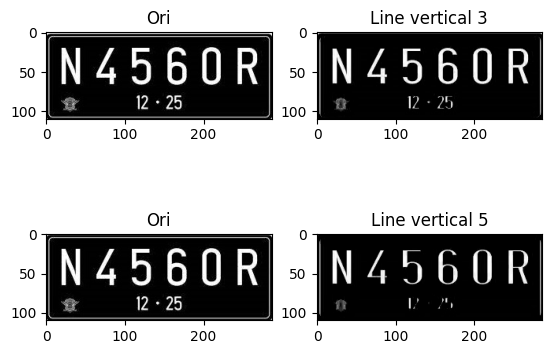

In [43]:
se_3 = np.array([[1],
                 [1],
                 [1]], dtype=np.uint8)

# Buat Structuring Element (SE) berbentuk Line Vertikal 5
se_5 = np.array([[1],
                 [1],
                 [1],
                 [1],
                 [1]], dtype=np.uint8)

# Operasi Erosi dengan SE 3
eroded_image_3 = erode(image, se_3)

# Operasi Erosi dengan SE 5
eroded_image_5 = erode(image, se_5)

plt.subplot(2, 2, 1)  # Subplot pertama
plt.imshow(image,cmap = 'gray')
plt.title('Ori')

plt.subplot(2, 2, 2)  # Subplot kedua
plt.imshow(eroded_image_3 ,cmap = 'gray')
plt.title('Line vertical 3')

plt.subplot(2, 2, 3)  # Subplot pertama
plt.imshow(image,cmap = 'gray')
plt.title('Ori')

plt.subplot(2, 2, 4)  # Subplot kedua
plt.imshow(eroded_image_5 ,cmap = 'gray')
plt.title('Line vertical 5')

13. TopHat

Text(0.5, 1.0, 'Top Hat')

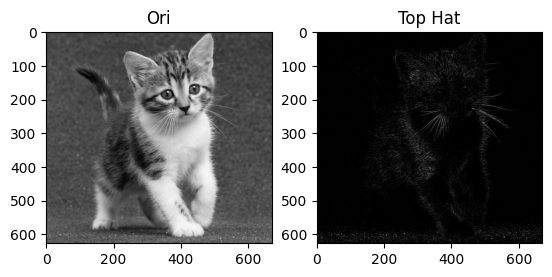

In [52]:
kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3))

# Reading the image named 'input.jpg'
kucing = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten.jpg')
kucing = cv.cvtColor(kucing, cv.COLOR_BGR2GRAY)

# Applying the Top-Hat operation
tophat_img = cv.morphologyEx(kucing, cv.MORPH_TOPHAT, kernel)

plt.subplot(1, 2, 1)  # Subplot pertama
plt.imshow(kucing,cmap = 'gray')
plt.title('Ori')

plt.subplot(1, 2, 2)  # Subplot kedua
plt.imshow(tophat_img ,cmap = 'gray')
plt.title('Top Hat')

14. Black Hat

Text(0.5, 1.0, 'Black Hat')

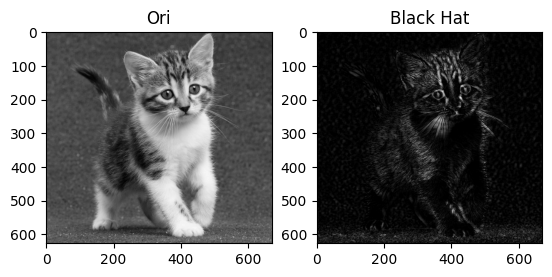

In [53]:
Kernel = cv.getStructuringElement(cv.MORPH_RECT, (13, 5))

blackhat_img = cv.morphologyEx(kucing, cv.MORPH_BLACKHAT, Kernel)

plt.subplot(1, 2, 1)  # Subplot pertama
plt.imshow(kucing,cmap = 'gray')
plt.title('Ori')

plt.subplot(1, 2, 2)  # Subplot kedua
plt.imshow(blackhat_img ,cmap = 'gray')
plt.title('Black Hat')

15. skeleton

Text(0.5, 1.0, 'Skeleton')

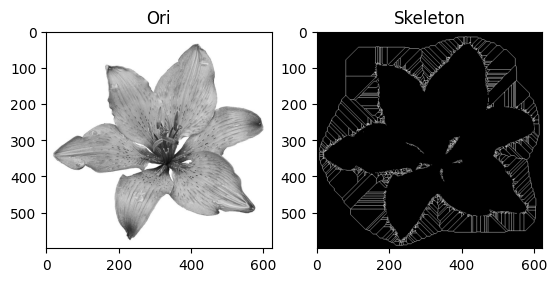

In [64]:
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg',0)

binary = img > filters.threshold_triangle(img)

# true false to one
binary_cp = binary.copy()

binary_cp[binary_cp == True] = 1

binary_cp[binary_cp == False] = 0

# skeletonize image

skeleton = skeletonize(binary_cp)

plt.subplot(1, 2, 1)  # Subplot pertama
plt.imshow(img,cmap = 'gray')
plt.title('Ori')

plt.subplot(1, 2, 2)  # Subplot kedua
plt.imshow(skeleton,cmap = 'gray')
plt.title('Skeleton')

16. skeleton inverse

Text(0.5, 1.0, 'Skeleton Inverse')

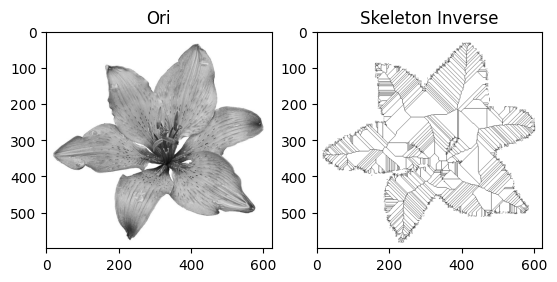

In [59]:
binary = img < filters.threshold_triangle(img)
# skeletonize image

skeleton = skeletonize(binary)

plt.subplot(1, 2, 1)  # Subplot pertama
plt.imshow(img,cmap = 'gray')
plt.title('Ori')

plt.subplot(1, 2, 2)  # Subplot kedua
plt.imshow(skeleton,cmap = 'gray_r')
plt.title('Skeleton Inverse')

17. thinning

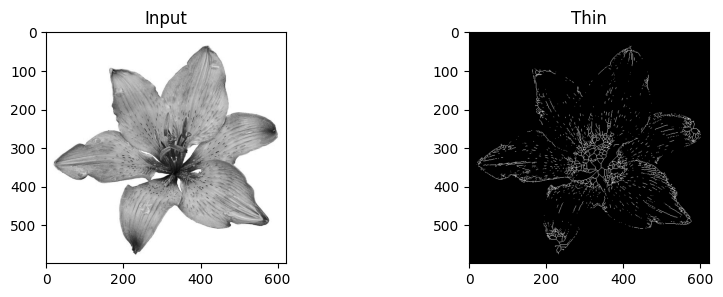

In [57]:
from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')))

image_binary = image < 0.5

out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')
ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')
plt.savefig('/tmp/char_out.png')
plt.show()

# Tugas

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra tersebut.

MENCOBA KE 1 KTP

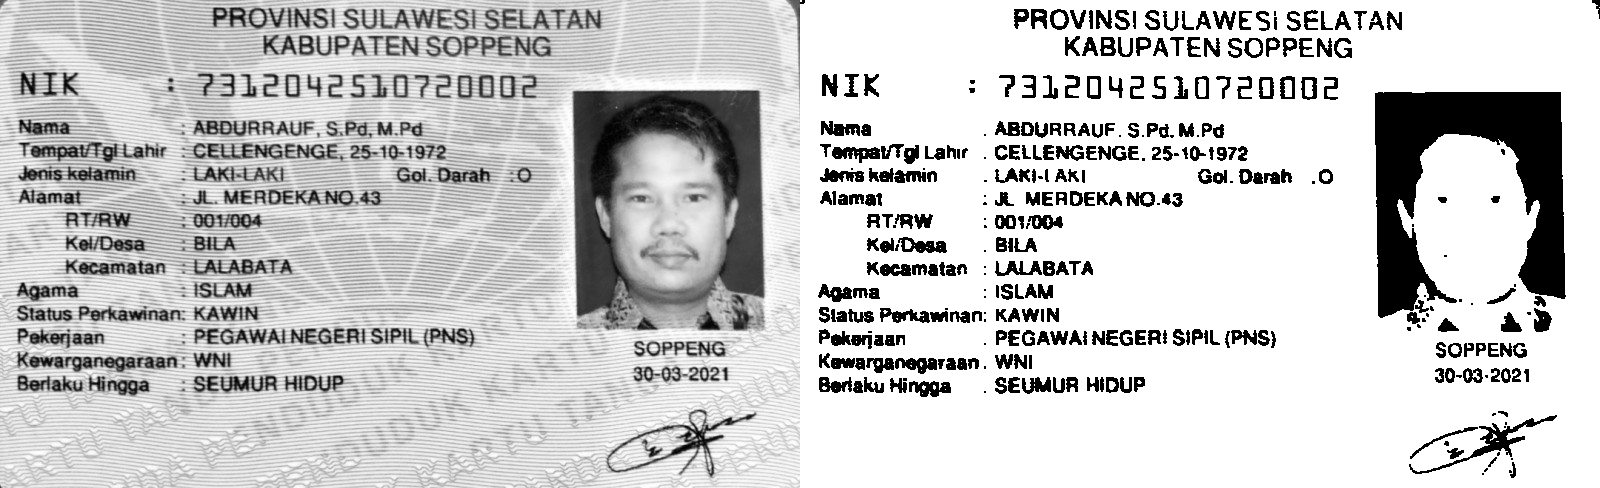

In [155]:
ktp1 = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP1.jpg',0)

se=np.ones((2, 2), np.uint8)
ret,thresh = cv.threshold(ktp1,93,255,0)
erode_image = cv.erode(thresh,se)
open_image = cv.morphologyEx(erode_image, cv.MORPH_OPEN,se)
close_image = cv.morphologyEx(erode_image, cv.MORPH_CLOSE,se)

final = cv.hconcat([ktp1, close_image])
cv2_imshow(final)

